### Fill out:
Name & Surname:DENG YUXUAN

Student ID:34254900

## W5&W6 post studio exercises (time series, imputation)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

Required files (download these from the Gitlab site into the same directory as the notebook on your computer):

* [traffic-data.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Pandas-DataFrames/Time-Series/traffic-data.csv)

* [abalone.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/blob/main/Machine-Learning/Imputation/abalone.csv) 

Once downloaded, run the following cells and use these dataframes in the exercises.

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
import pandas as pd
# traffic data -Q1, Q2, Q5, Q6
raw_traffic_data = pd.read_csv('C:/Users/Leo/Downloads/traffic-data.csv')

# Create a new index from the timestamp column, with the proper type.
traffic_data = raw_traffic_data.set_index(pd.to_datetime(raw_traffic_data["Timestamp"]))

# Delete the column with our old string representation of times.
traffic_data = traffic_data.drop(columns=["Timestamp"])

traffic_data = traffic_data.assign(
    Date=lambda df: df.index.floor("D"),
    TimeOfDay=lambda df: df.index - df.Date,
    DayOfWeek=lambda df: df.index.day_name().astype("category"),
)


Abalone dataset - This consists of physical measurements of abalones from the Tasmanian coast in the 1990s, in an effort to determine their age. Previously the age would need to be determined in the laboratory by counting the number of rings in the shell. Relationship used to determine age is: 
*Age* = *# of rings + 1.5*. 

This is a complete dataset, however we will randomly remove entries in two columns to perform imputation.

First we load the dataset.

In [21]:
abalone = pd.read_csv("abalone.csv")
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


The Sex field has three categorical entries: Male (M), Female (F) and Infant (I). Se we need to **one-hot encode** these fields to create three binary columns (encode categorical features to equivalent numerical information).

In [16]:
dummy = pd.get_dummies(abalone['Sex'])
abalone = pd.concat([abalone, dummy], axis=1)
abalone.drop(columns=['Sex'], inplace=True)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


Lastly we create a features array (X_full) and a target array (Y), the target being Rings. Then we randomly remove 33% of the Height samples and 25% of the Shell weight samples from the features array to get X_rm.

In [17]:
X_full = abalone.drop(columns=['Rings'])
Y = abalone[['Rings']]

X_rm = X_full.copy()
X_rm['Height'] = X_rm['Height'].sample(frac=0.67, random_state = 42)
X_rm['Shell weight'] = X_rm['Shell weight'].sample(frac=0.75, random_state = 64)

#X_rm.describe()

### Exercise 1 (Filtering - traffic_data)

Plot only the data (from the full day) for 18th January 2021 for Site 107 as a line plot. What is the busiest period of the day? Are there any issues with this data? Show data between 1pm and 3p and comment on the values.

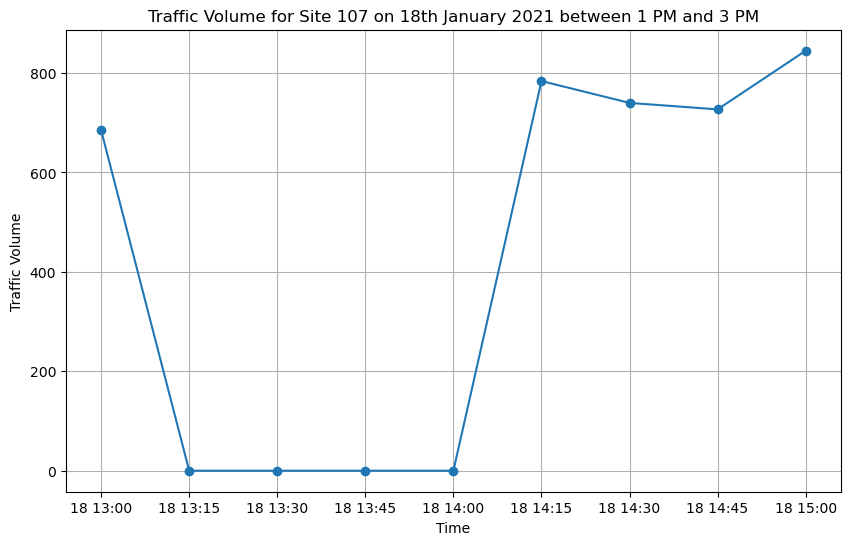

In [33]:

# Reading Dataset
#traffic_data = pd.read_csv('C:/Users/Leo/Downloads/traffic-data.csv')


# Import necessary libraries for data processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the traffic data 
traffic_data = pd.read_csv('C:/Users/Leo/Downloads/traffic-data.csv')

# Convert the Timestamp column to datetime format and set it as the index
traffic_data['Timestamp'] = pd.to_datetime(traffic_data['Timestamp'])
traffic_data.set_index('Timestamp', inplace=True)

# Extract data for 18th January 2021 for Site 107, and filter between 1 PM and 3 PM
filtered_data_site_107 = traffic_data.loc['2021-01-18'].between_time('13:00', '15:00')['Site 107']

# Plot the filtered data 
plt.figure(figsize=(10, 6))
plt.plot(filtered_data_site_107.index, filtered_data_site_107, marker='o')
plt.title('Traffic Volume for Site 107 on 18th January 2021 between 1 PM and 3 PM')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()



### Exercise 2 (Resampling - traffic_data)
Calculate and plot the number of cars seen in the busiest 15 minute period each day for Site 103 (i.e. the maximum of all 15 minute periods across each day). What do you observe?

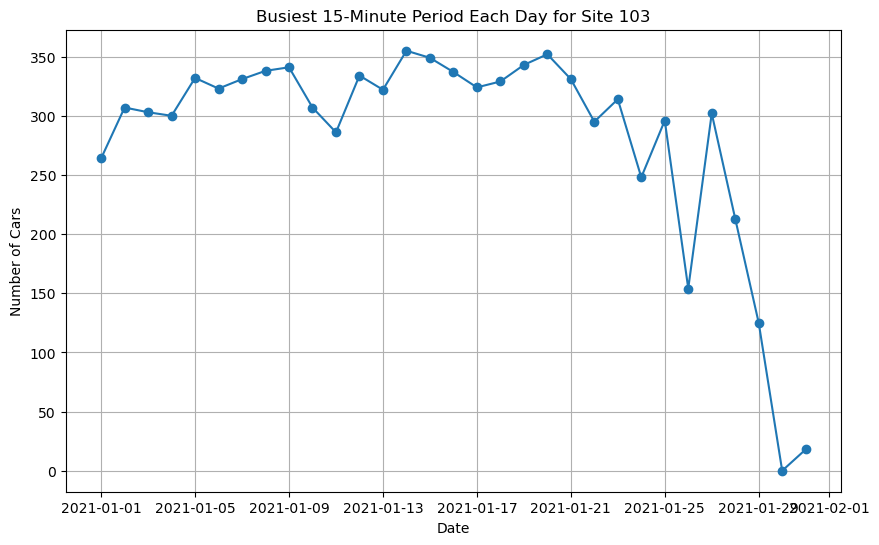

In [34]:
# Resample the data for Site 103 to find the busiest 15-minute period each day
site_103_data = traffic_data['Site 103']

# Resample to 15-minute intervals and find the maximum number of cars in each period across each day
busiest_15_min_per_day = site_103_data.resample('15T').sum().resample('D').max()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(busiest_15_min_per_day.index, busiest_15_min_per_day, marker='o')
plt.title('Busiest 15-Minute Period Each Day for Site 103')
plt.xlabel('Date')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()


### Exercise 3 (Imputing with mean or median - using X_rm based on abalone)
Consider the dataframe X_simple_imputer below.

For this dataframe:

- Show counts of missing data for all columns. 
- Impute the missing values in the Height column with its mean.
- Impute the missing values in the Shell weight column with its median.
- Show first 10 rows after imputation.
- Show counts of missing data after imputation.

In [64]:
# Interpolation using the X_rm data frame
X_simple_imputer = X_rm.copy()

# Display missing data counts for all columns
print("Missing data counts before imputation:")
missing_before = X_simple_imputer.isnull().sum()
print(missing_before)

# Fill missing values 
X_simple_imputer['Height'].fillna(X_simple_imputer['Height'].mean(), inplace=True)

# Fill missing values 
X_simple_imputer['Shell weight'].fillna(X_simple_imputer['Shell weight'].median(), inplace=True)

# Display the first 10 rows of data after interpolation
print("\nFirst 10 rows after imputation:")
print(X_simple_imputer.head(10))

# Displays the missing data count after imputation
print("\nMissing data counts after imputation:")
missing_after = X_simple_imputer.isnull().sum()
print(missing_after)


Missing data counts before imputation:
Timestamp    0
Site 100     0
Site 101     0
Site 102     0
Site 103     0
Site 105     0
Site 106     0
Site 107     0
Site 108     0
Site 109     0
dtype: int64


KeyError: 'Height'

### Exercise 4 (kNN imputer - X_rm dataframe based on abalone)
Consider the dataframe X_kNN_imputer below. Utilise the kNN imputer with n_neighbors = 5 in order to fill in the missing values of X_kNN_imputer. As we have one hot encoded our data, we will use the MinMaxScaler from SciKit-Learn to normalise our data. After you have done your kNN imputation, please unnormalise your data afterwards!

Also show first 10 entries of the final dataframe.

In [63]:

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Create the X_kNN_imputer data frame
X_kNN_imputer = X_rm.copy()

# Checking for non-numeric columns in a data frame
print("The columns in the data frame and their data types:")
print(X_kNN_imputer.dtypes)

# Select all numeric columns
X_kNN_imputer_numeric = X_kNN_imputer.select_dtypes(include=[np.number])

# Initialize the MinMaxScaler object
scaler = MinMaxScaler()

# Record column name
X_columns_numeric = X_kNN_imputer_numeric.columns

# Standardize the data
X_kNN_imputer_normalized = pd.DataFrame(scaler.fit_transform(X_kNN_imputer_numeric), columns=X_columns_numeric)

# Filling missing values
knn_imputer = KNNImputer(n_neighbors=5)
X_kNN_imputed_normalized = pd.DataFrame(knn_imputer.fit_transform(X_kNN_imputer_normalized), columns=X_columns_numeric)

# Denormalization
X_kNN_imputed = pd.DataFrame(scaler.inverse_transform(X_kNN_imputed_normalized), columns=X_columns_numeric)

# Display the first 10 rows of data after interpolation
knn_imputed_preview = X_kNN_imputed.head(10)



The columns in the data frame and their data types:
Timestamp     object
Site 100     float64
Site 101     float64
Site 102     float64
Site 103     float64
Site 105     float64
Site 106     float64
Site 107     float64
Site 108     float64
Site 109     float64
dtype: object


## Extra exercises

The following exercises with (*) will not be assessed. Use these to check your understanding of topics covered in the past 2 weeks.

### Exercise 5* (Rolling - traffic_data)
Plot the 2-hourly rolling mean, over the first week of January for Site 109. What is the busiest day in this period?

### Exercise 6* (Pivot/aggregate - traffic_data)
Plot the maximum traffic seen in each 15 minute window of the day on any Monday in the dataset for any two sites. What is the busiest time of day on a Monday at the sites you have chosen?

### Exercise 7* (Distributions for different imouters - abalone)
Plot histograms of:

The distribution of the Height feature in the X_simple_imputer dataframe.
The distribution of the Shell weight feature in the X_simple_imputer dataframe.
The distribution of the Height feature in the X_kNN_imputer dataframe.
The distribution of the Shell weight feature in the X_kNN_imputer dataframe.

In [8]:
# Use the following command to set up a figure with 4 subplots.

# fig, axes = plt.subplots(2, 2, figsize=(10, 10));

### Exercise 8* (kNN imputer for regression model - abalone)
Below I have created a k-Nearest Neighbours Regression (not Classification!) model for the full dataset X_full and determined the R2 score of the model. Here I have chosen n_neighbours = 5 and I have used a 80:20 split for training and testing.

You have two tasks. In both tasks you should use n_neighbors = 5 and an 80:20 split for training and testing.

Create a k-Nearest Neighbours model for the X_simple_imputer dataset and determine the R2 score of this model.
Create a k-Nearest Neighbours model for the X_kNN_imputer dataset and determine the R2 score of this model.
Are the R2 scores as you expected?

N.B. Remember that the kNN algorithm utilises Euclidean distance in order to calculate distances between features, and therefore requires the feature set to be normalised. This normalisation is done in the code for you.

In [9]:
X_ex4 = X_full.copy()
Y_ex4 = Y.copy()
X_columns = X_ex4.columns

In [10]:
# Fit the kNN model with the X_full dataframe. This is done for you as an example.

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Normalise the data for the kNN algorithm
X_ex4 = pd.DataFrame(scaler.fit_transform(X_ex4), columns = X_columns)
    
X_train, X_test, Y_train, Y_test = train_test_split(X_ex4, Y_ex4, test_size=0.2, random_state = 0) 
kNN = KNeighborsRegressor(n_neighbors = 5)
kNN.fit(X_train, Y_train) # fit the data to the model
Y_pred = kNN.predict(X_test) # Predict the target values from the test feature data
acc = r2_score(Y_test,Y_pred) 

print(f'R2 score is {acc:.3f}')

R2 score is 0.507


In [11]:
# Task 1: Fit a kNN model with the X_simple_imputer dataframe and compute the r2 score.

# Normalise data for kNN algorithm
X_simple_imputer = pd.DataFrame(scaler.fit_transform(X_simple_imputer), columns = X_columns)

X_simple_imputer

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.513514,0.521008,0.075893,0.181335,0.150303,0.132324,0.147982,0.0,0.0,1.0
1,0.371622,0.352941,NaN,0.079157,0.066241,0.063199,0.068261,0.0,0.0,1.0
2,0.614865,0.613445,0.111607,0.239065,0.171822,0.185648,0.207773,1.0,0.0,0.0
3,0.493243,0.521008,NaN,0.182044,0.144250,0.149440,0.152965,0.0,0.0,1.0
4,0.344595,0.336134,NaN,0.071897,0.059516,0.051350,0.053313,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,NaN,0.313441,0.248151,0.314022,NaN,1.0,0.0,0.0
4173,0.695946,0.647059,0.111607,0.341420,0.294553,0.281764,NaN,0.0,0.0,1.0
4174,0.709459,0.705882,0.174107,0.415796,0.352724,0.377880,0.305431,0.0,0.0,1.0
4175,0.743243,0.722689,0.125000,0.386931,0.356422,0.342989,NaN,1.0,0.0,0.0


In [12]:
# Task 2: Fit a kNN model with the X_kNN_imputer dataframe and compute the r2 score.

# Normalise data for kNN algorithm
X_kNN_imputer = pd.DataFrame(scaler.fit_transform(X_kNN_imputer), columns = X_columns)

X_kNN_imputer

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.513514,0.521008,0.075893,0.181335,0.150303,0.132324,0.147982,0.0,0.0,1.0
1,0.371622,0.352941,NaN,0.079157,0.066241,0.063199,0.068261,0.0,0.0,1.0
2,0.614865,0.613445,0.111607,0.239065,0.171822,0.185648,0.207773,1.0,0.0,0.0
3,0.493243,0.521008,NaN,0.182044,0.144250,0.149440,0.152965,0.0,0.0,1.0
4,0.344595,0.336134,NaN,0.071897,0.059516,0.051350,0.053313,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,NaN,0.313441,0.248151,0.314022,NaN,1.0,0.0,0.0
4173,0.695946,0.647059,0.111607,0.341420,0.294553,0.281764,NaN,0.0,0.0,1.0
4174,0.709459,0.705882,0.174107,0.415796,0.352724,0.377880,0.305431,0.0,0.0,1.0
4175,0.743243,0.722689,0.125000,0.386931,0.356422,0.342989,NaN,1.0,0.0,0.0
